In [1]:
library(ArchR)
library(here)
library(Seurat)
library(SeuratDisk)
library(SingleCellExperiment)
options(repr.plot.width=15, repr.plot.height=11)
## add general functions at the top of the R scripts
ss <- function(x, pattern, slot = 1, ...) { sapply(strsplit(x = x, split = pattern, ...), '[', slot) }


                                                   / |
                                                 /    \
            .                                  /      |.
            \\\                              /        |.
              \\\                          /           `|.
                \\\                      /              |.
                  \                    /                |\
                  \\#####\           /                  ||
                ==###########>      /                   ||
                 \\##==......\    /                     ||
            ______ =       =|__ /__                     ||      \\\
        ,--' ,----`-,__ ___/'  --,-`-===================##========>
       \               '        ##_______ _____ ,--,__,=##,__   ///
        ,    __==    ___,-,__,--'#'  ==='      `-'    | ##,-/
        -,____,---'       \\####\\________________,--\\_##,/
           ___      .______        ______  __    __  .______      
          /   \     |   _ 

In [2]:
#archr settings
addArchRGenome("mm10")
addArchRThreads(threads = 8) 

Setting default genome to Mm10.

Setting default number of Parallel threads to 8.



In [3]:
PROJNAME = "BICCN_mouse_Str_snATAC2_MSN"
PROJPATH = here(here("data/tidy_data/ArchRProjects"),PROJNAME) #subset proj name
PROJPATH
proj = loadArchRProject(PROJPATH)

[1] "/projects/pfenninggroup/singleCell/BICCN_mouse_CATlas_snATAC-seq/data/tidy_data/ArchRProjects/BICCN_mouse_Str_snATAC2_MSN"

Successfully loaded ArchRProject!


                                                   / |
                                                 /    \
            .                                  /      |.
            \\\                              /        |.
              \\\                          /           `|.
                \\\                      /              |.
                  \                    /                |\
                  \\#####\           /                  ||
                ==###########>      /                   ||
                 \\##==......\    /                     ||
            ______ =       =|__ /__                     ||      \\\
        ,--' ,----`-,__ ___/'  --,-`-===================##========>
       \               '        ##_______ _____ ,--,__,=##,__   ///
        ,    __==    ___,-,__,--'#'  ==='      `-'    | ##,-/
        -,____,---'       \\####\\________________,--\\_##,/
           ___      .______        ______  __    __  .____

ArchR logging to : ArchRLogs/ArchR-plotEmbedding-69a94856ba84-Date-2024-03-20_Time-17-55-18.832757.log
If there is an issue, please report to github with logFile!

Getting UMAP Embedding

ColorBy = cellColData

Plotting Embedding

1 
2 
3 


ArchR logging successful to : ArchRLogs/ArchR-plotEmbedding-69a94856ba84-Date-2024-03-20_Time-17-55-18.832757.log

Warning message:
“The `<scale>` argument of `guides()` cannot be `FALSE`. Use "none" instead as
of ggplot2 3.3.4.”


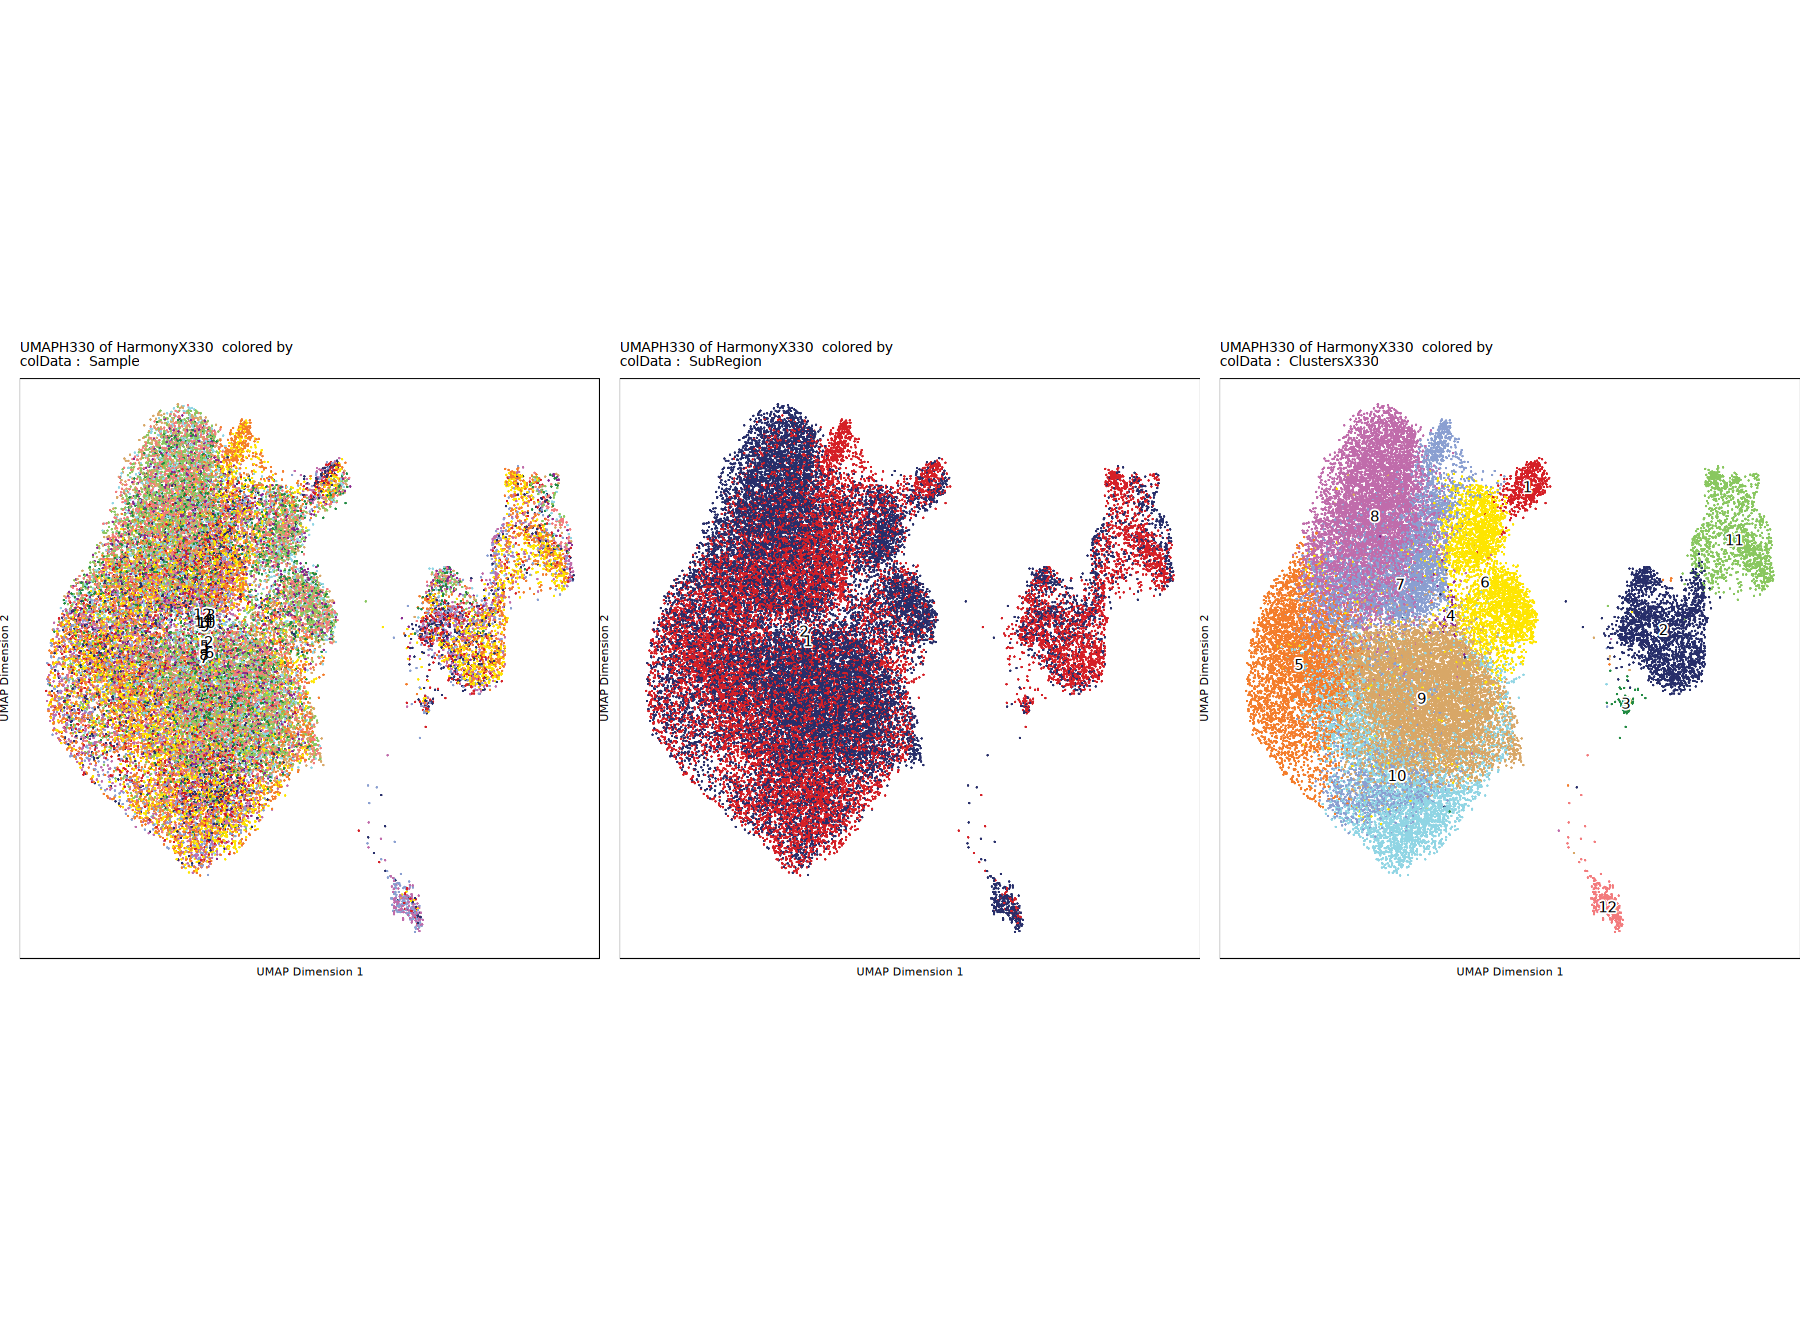

In [4]:
p <- plotEmbedding( ArchRProj = proj, colorBy = "cellColData", name = c('Sample', 'SubRegion', 'ClustersX330'), embedding = "UMAPH330") 
p3 <- lapply(p, function(x){
  x + guides(color = FALSE, fill = FALSE) + 
    theme_ArchR(baseSize = 6.5) + theme(plot.margin = unit(c(0, 0, 0, 0), "cm")) +
    theme(axis.text.x=element_blank(),  axis.ticks.x=element_blank(), 
          axis.text.y=element_blank(),  axis.ticks.y=element_blank())
})
do.call(cowplot::plot_grid, c(list(ncol = 3),p3))

ArchR logging to : ArchRLogs/ArchR-plotEmbedding-69a97f154fc1-Date-2024-03-20_Time-17-56-28.318016.log
If there is an issue, please report to github with logFile!

Getting UMAP Embedding

ColorBy = GeneScoreMatrix

Getting Matrix Values...

2024-03-20 17:56:28.690296 : 



Plotting Embedding

1 
2 
3 
4 
5 
6 


ArchR logging successful to : ArchRLogs/ArchR-plotEmbedding-69a97f154fc1-Date-2024-03-20_Time-17-56-28.318016.log



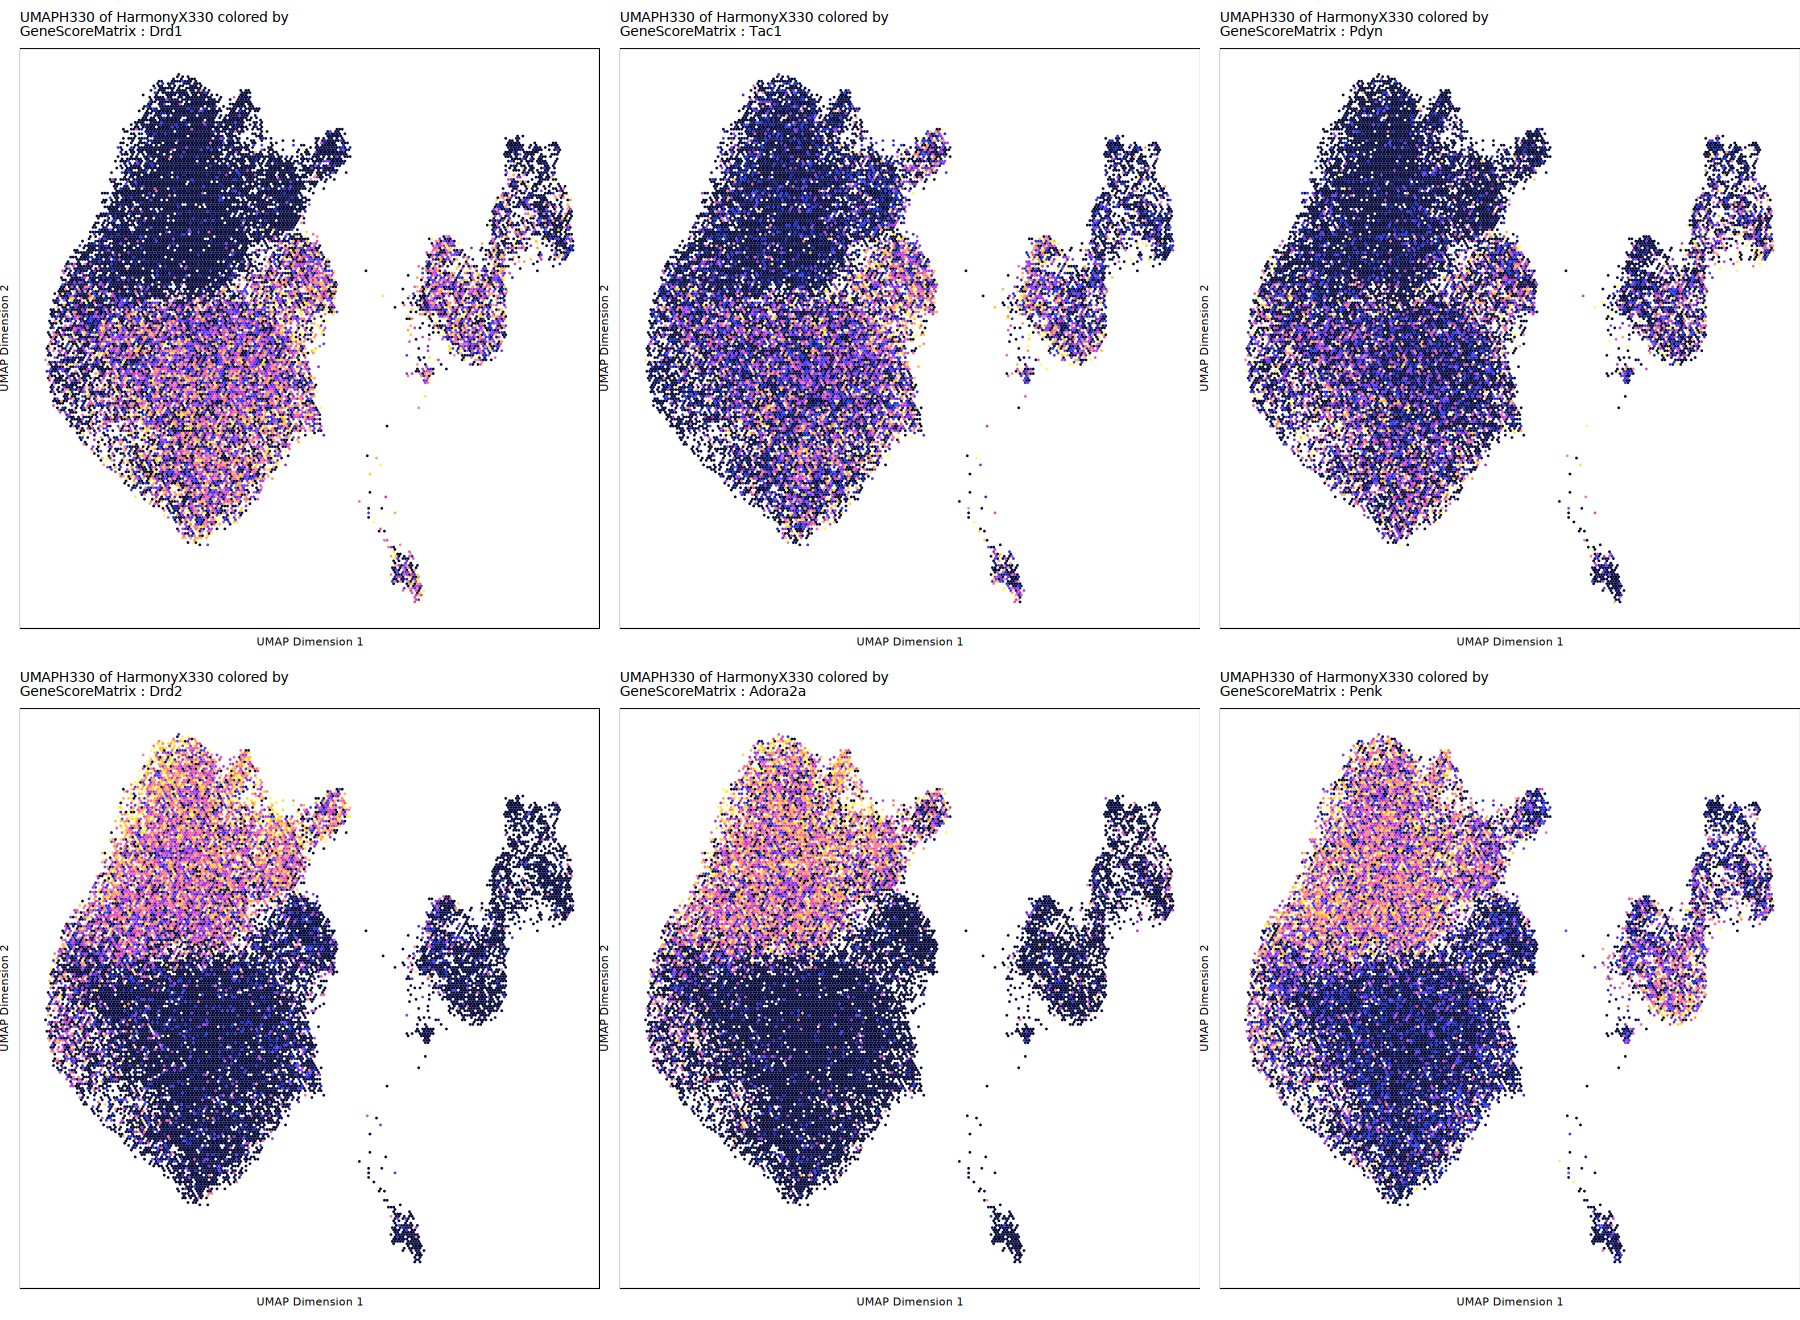

In [5]:
markMSN1 = c('Drd1','Tac1', 'Pdyn', 'Drd2','Adora2a','Penk') # D1 & D2 markers

# D1 MSN
p <- plotEmbedding( ArchRProj = proj, colorBy = "GeneScoreMatrix", 
                    name = markMSN1, embedding = "UMAPH330", imputeWeights = NULL) # 
p1 <- lapply(p, function(x){
  x + guides(color = FALSE, fill = FALSE) + 
    theme_ArchR(baseSize = 6.5) +
    theme(plot.margin = unit(c(0, 0, 0, 0), "cm")) +
    theme( axis.text.x=element_blank(),  axis.ticks.x=element_blank(), 
           axis.text.y=element_blank(),  axis.ticks.y=element_blank())
})
do.call(cowplot::plot_grid, c(list(ncol = 3),p1))

ArchR logging to : ArchRLogs/ArchR-plotEmbedding-69a93f088b5d-Date-2024-03-20_Time-17-57-12.553345.log
If there is an issue, please report to github with logFile!

Getting UMAP Embedding

ColorBy = GeneScoreMatrix

Getting Matrix Values...

2024-03-20 17:57:13.002568 : 



Plotting Embedding

1 
2 
3 
4 
5 
6 


ArchR logging successful to : ArchRLogs/ArchR-plotEmbedding-69a93f088b5d-Date-2024-03-20_Time-17-57-12.553345.log



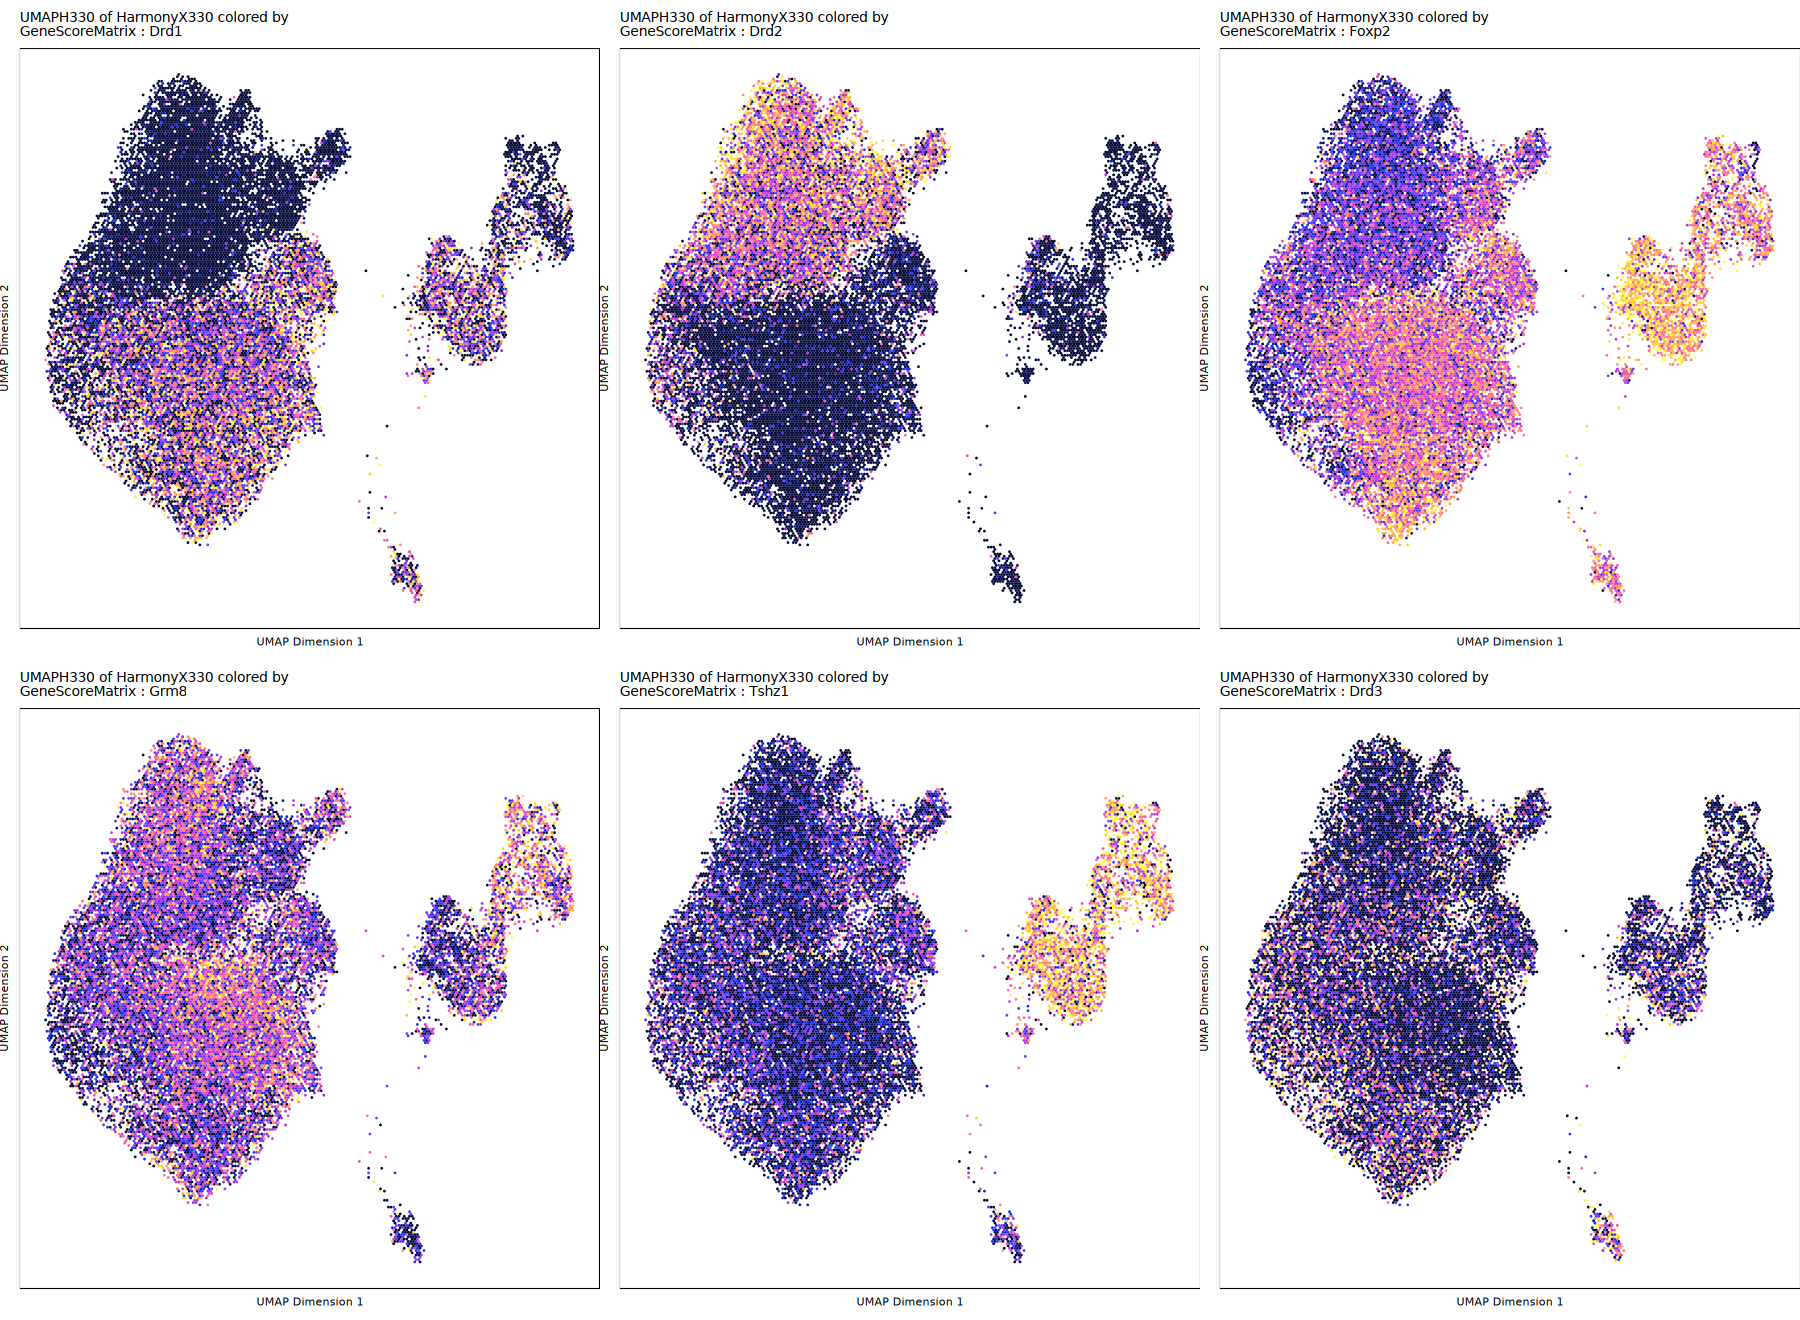

In [6]:
markMSN2 = c('Drd1', 'Drd2', 'Foxp2', 'Grm8','Tshz1', 'Drd3')# eSPN, D1/D2, IC markers

# D2 MSN
p <- plotEmbedding( ArchRProj = proj, colorBy = "GeneScoreMatrix", 
                    name = markMSN2, embedding = "UMAPH330", imputeWeights = NULL)
p2 <- lapply(p, function(x){
  x + guides(color = FALSE, fill = FALSE) + 
    theme_ArchR(baseSize = 6.5) + theme(plot.margin = unit(c(0, 0, 0, 0), "cm")) +
    theme(  axis.text.x=element_blank(),  axis.ticks.x=element_blank(), 
            axis.text.y=element_blank(),  axis.ticks.y=element_blank())
})
do.call(cowplot::plot_grid, c(list(ncol = 3),p2))

ArchR logging to : ArchRLogs/ArchR-plotEmbedding-69a977784e28-Date-2024-03-20_Time-18-05-55.974125.log
If there is an issue, please report to github with logFile!

Getting UMAP Embedding

ColorBy = cellColData

Plotting Embedding

1 
2 


ArchR logging successful to : ArchRLogs/ArchR-plotEmbedding-69a977784e28-Date-2024-03-20_Time-18-05-55.974125.log



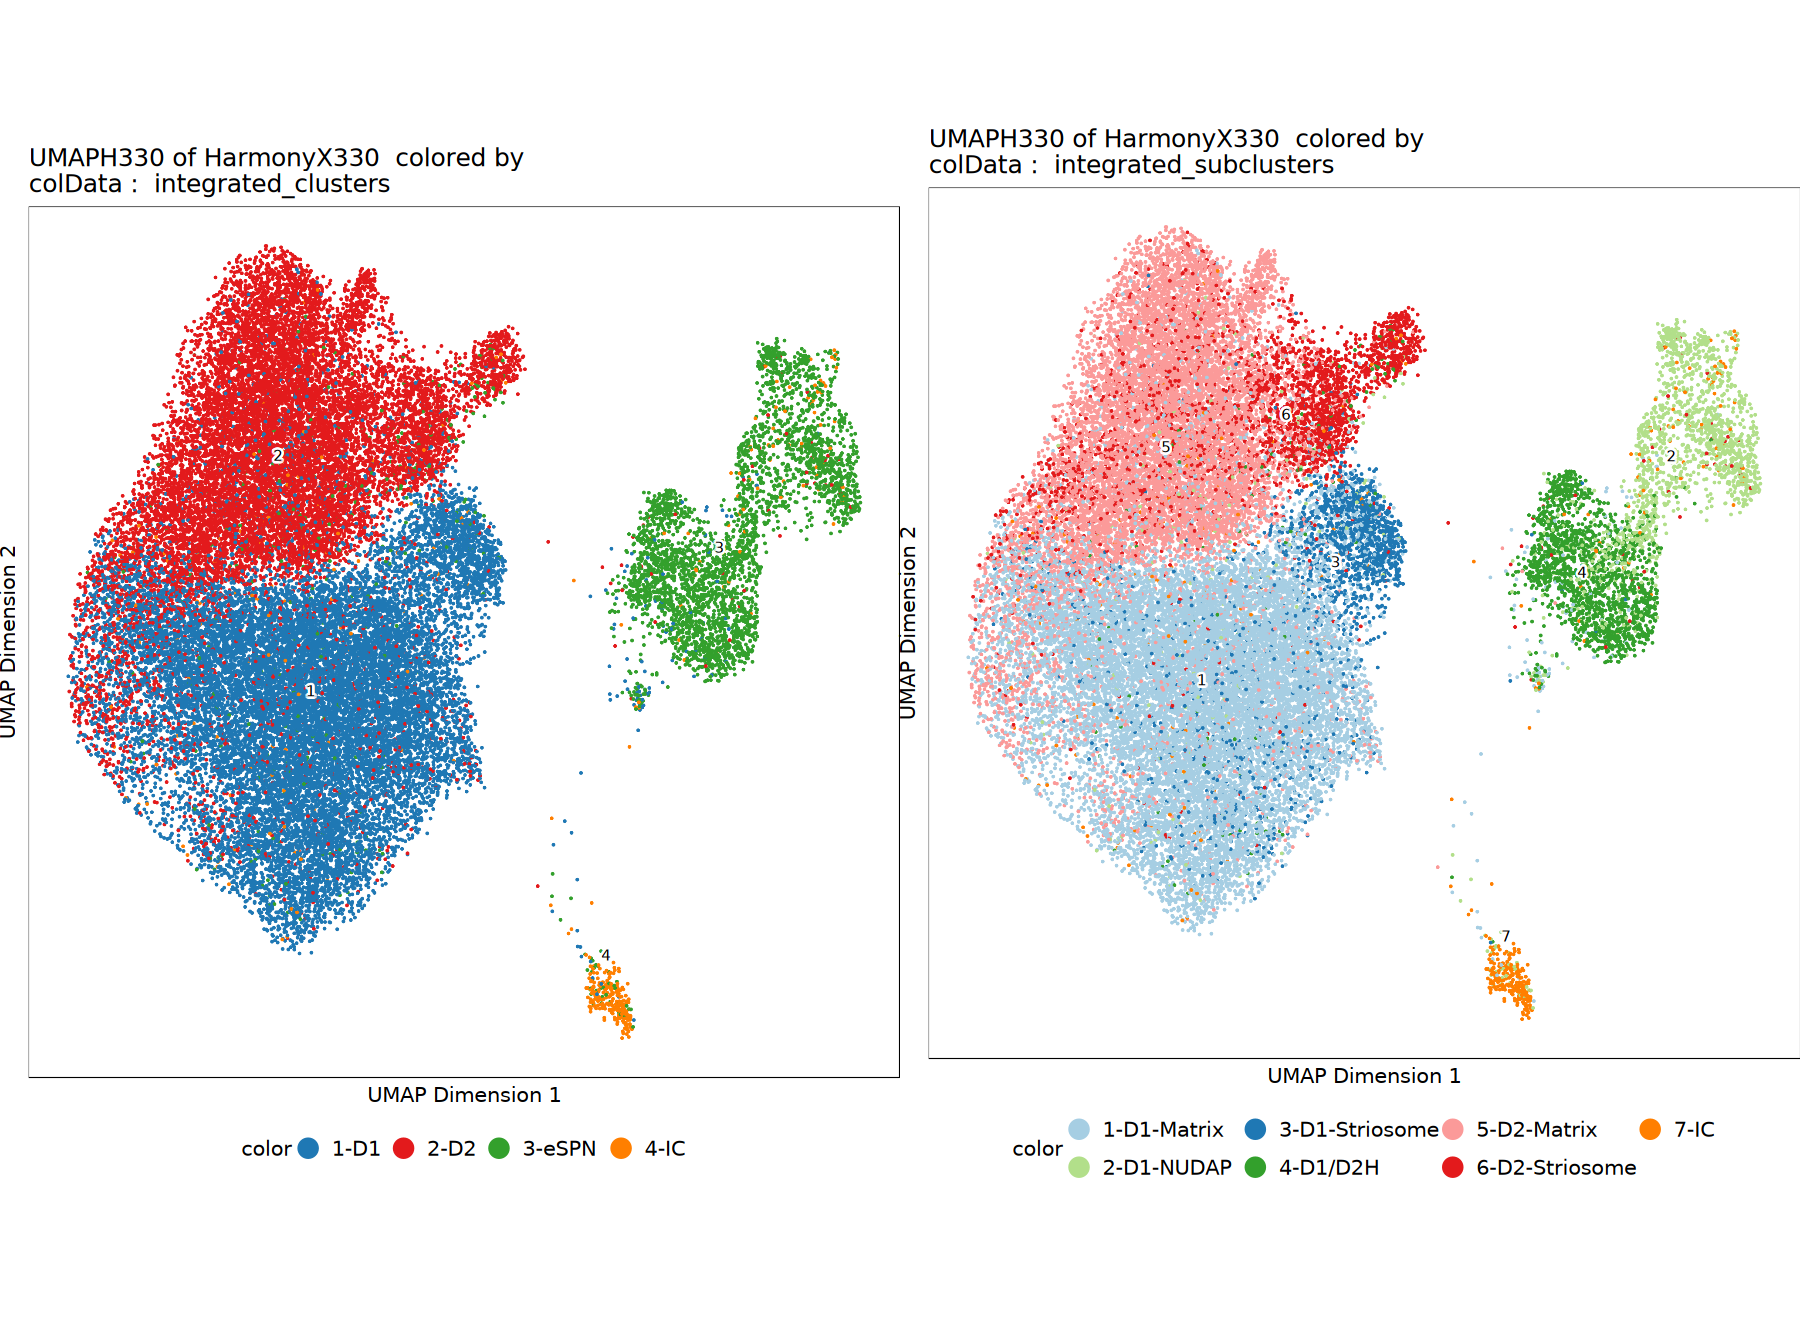

In [19]:
## make the plots
cols1 = setNames(RColorBrewer::brewer.pal(8,'Paired')[c(2,4,6,8)], c('D1', 'eSPN', 'D2', 'IC'))

cols2 = setNames(RColorBrewer::brewer.pal(7,'Paired'), 
                c('D1-Matrix', 'D1-Striosome', 'D1-NUDAP',  'D1/D2H', 'D2-Matrix', 'D2-Striosome', 'IC'))

cols = c(cols1, cols2)

p <- plotEmbedding(ArchRProj = proj, colorBy = "cellColData", 
                   name = c('integrated_clusters', 'integrated_subclusters'), 
                   embedding = "UMAPH330", pal = cols) 

       
p2 <- lapply(p, function(x){
  x + theme_ArchR(baseSize = 12) + theme(plot.margin = unit(c(0, 0, 0, 0), "cm")) +
    theme(  axis.text.x=element_blank(),  axis.ticks.x=element_blank(), 
            axis.text.y=element_blank(),  axis.ticks.y=element_blank(), 
            legend.text=element_text(size= 12)) + 
    guides(color = guide_legend(override.aes = list(size=5)))
})
do.call(cowplot::plot_grid, c(list(ncol = 2),p2))

In [39]:
markerGenes  <- c( "Drd1", "Drd2", "Drd3", "Foxp2", 'Tshz1')

p <- plotBrowserTrack( 
    ArchRProj = proj, groupBy = "integrated_clusters", geneSymbol = markerGenes, pal = cols,
    upstream = 500000, downstream = 500000)

ArchR logging to : ArchRLogs/ArchR-plotBrowserTrack-69a92250cc8-Date-2024-03-20_Time-18-16-53.838136.log
If there is an issue, please report to github with logFile!

2024-03-20 18:16:54.109936 : Validating Region, 0.005 mins elapsed.



GRanges object with 5 ranges and 2 metadata columns:
      seqnames            ranges strand |     gene_id      symbol
         <Rle>         <IRanges>  <Rle> | <character> <character>
  [1]    chr13 54051183-54055658      - |       13488        Drd1
  [2]     chr9 49340662-49407214      + |       13489        Drd2
  [3]    chr16 43762221-43822932      + |       13490        Drd3
  [4]     chr6 14901349-15441977      + |      114142       Foxp2
  [5]    chr18 84011627-84086562      - |      110796       Tshz1
  -------
  seqinfo: 21 sequences from mm10 genome


2024-03-20 18:16:54.227037 : Adding Bulk Tracks (1 of 5), 0.007 mins elapsed.

2024-03-20 18:17:06.332072 : Adding Gene Tracks (1 of 5), 0.208 mins elapsed.

2024-03-20 18:17:07.614129 : Plotting, 0.23 mins elapsed.

2024-03-20 18:17:09.752565 : Adding Bulk Tracks (2 of 5), 0.265 mins elapsed.

2024-03-20 18:17:17.015864 : Adding Gene Tracks (2 of 5), 0.386 mins elapsed.

2024-03-20 18:17:19.02702 : Plotting, 0.42 mins elapsed.

2024-03-20 18:17:21.036778 : Adding Bulk Tracks (3 of 5), 0.453 mins elapsed.

2024-03-20 18:17:28.052652 : Adding Gene Tracks (3 of 5), 0.57 mins elapsed.

2024-03-20 18:17:28.272922 : Plotting, 0.574 mins elapsed.

2024-03-20 18:17:30.681391 : Adding Bulk Tracks (4 of 5), 0.614 mins elapsed.

2024-03-20 18:17:41.507341 : Adding Gene Tracks (4 of 5), 0.795 mins elapsed.

2024-03-20 18:17:41.725429 : Plotting, 0.798 mins elapsed.

2024-03-20 18:17:44.125337 : Adding Bulk Tracks (5 of 5), 0.838 mins elapsed.

2024-03-20 18:17:52.760377 : Adding Gene Tracks (5 of

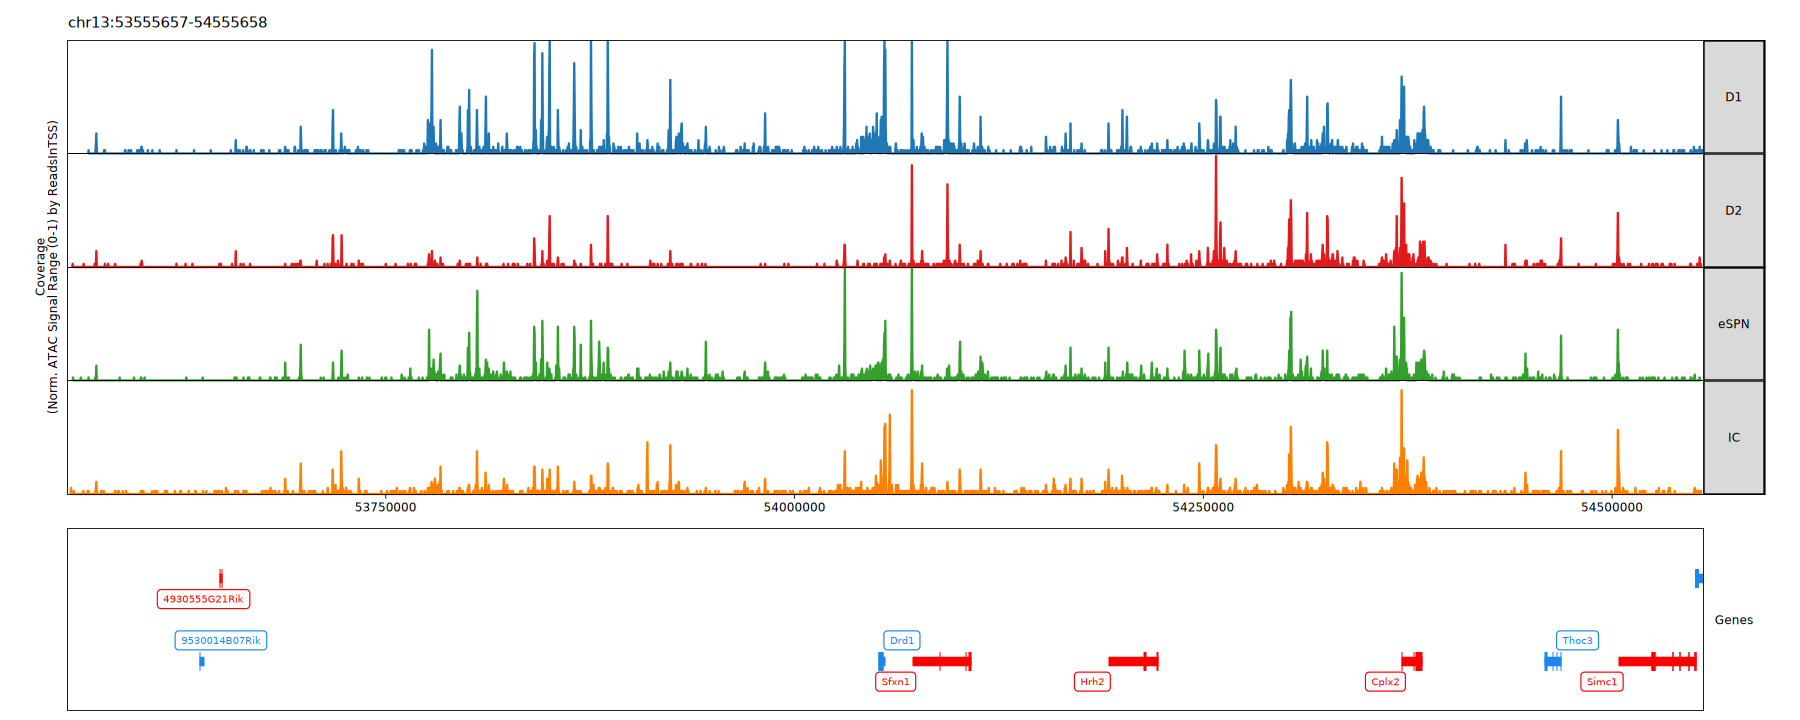

In [40]:
options(repr.plot.width=15, repr.plot.height=6)
grid::grid.draw(p$Drd1)

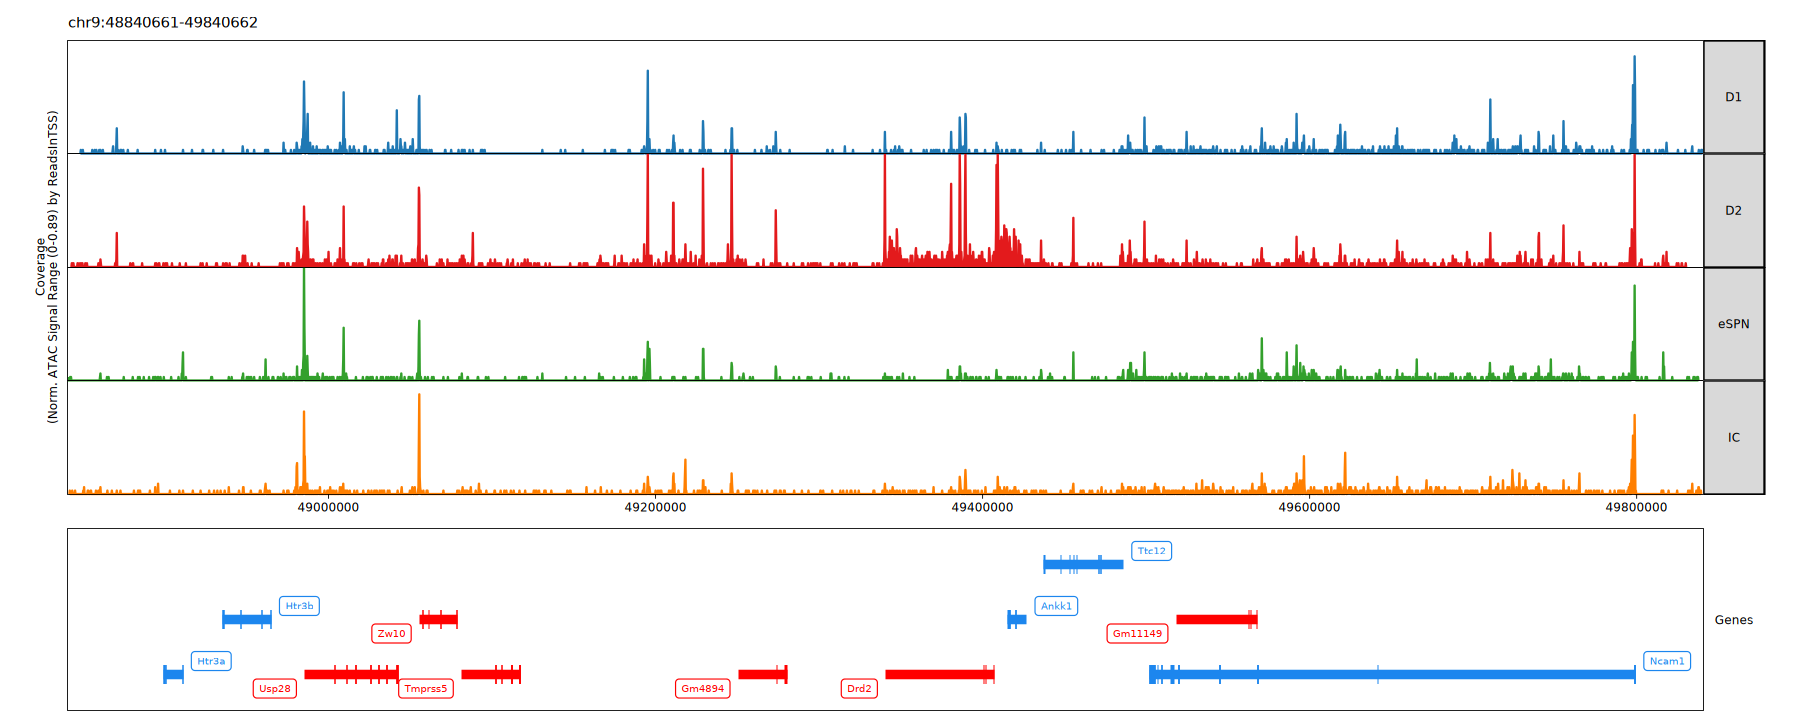

In [41]:
grid::grid.draw(p$Drd2)

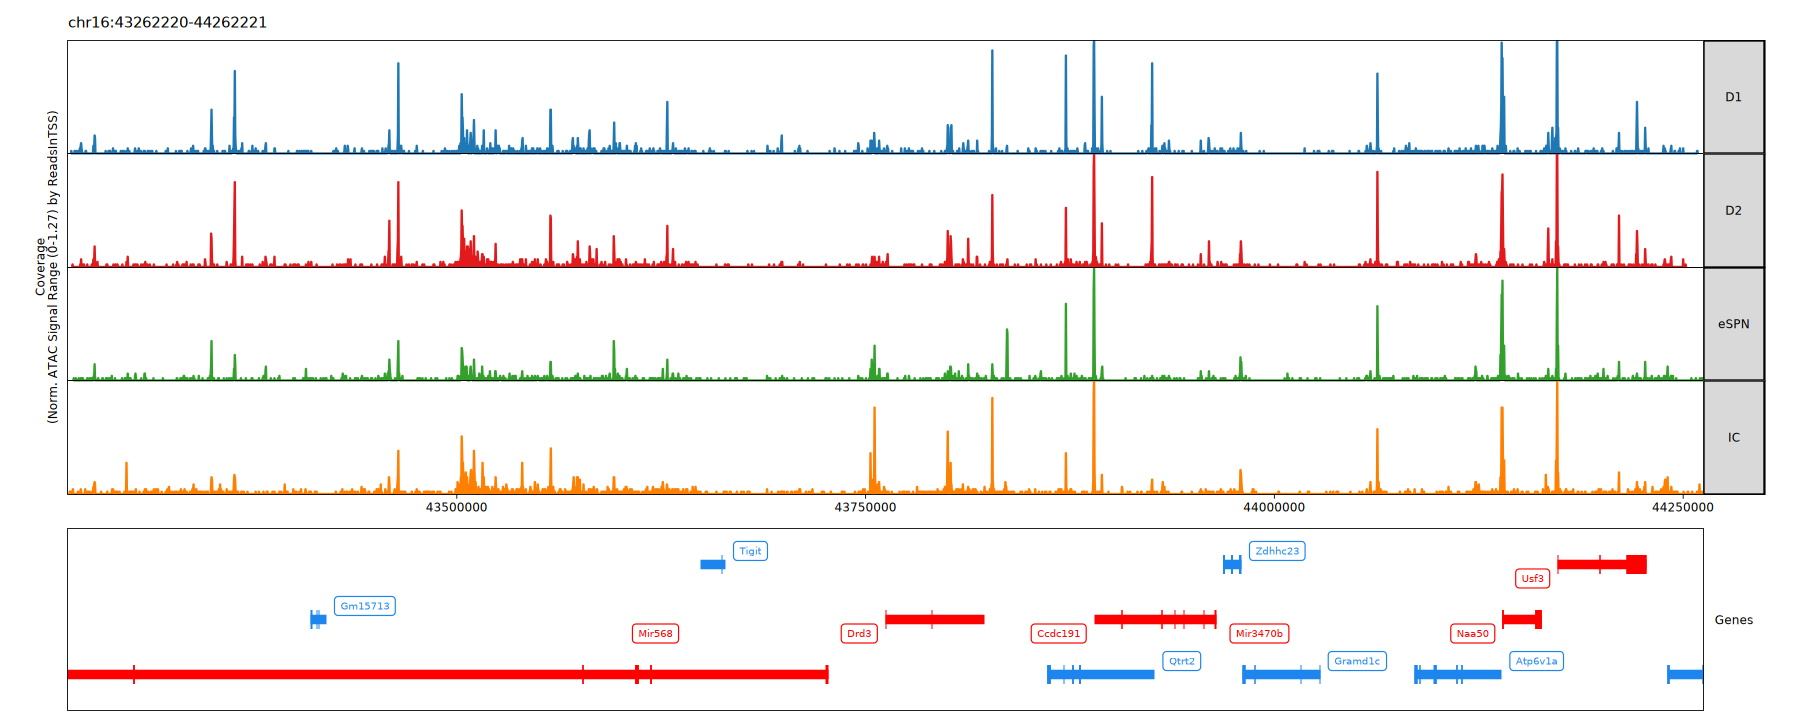

In [42]:
grid::grid.draw(p$Drd3)

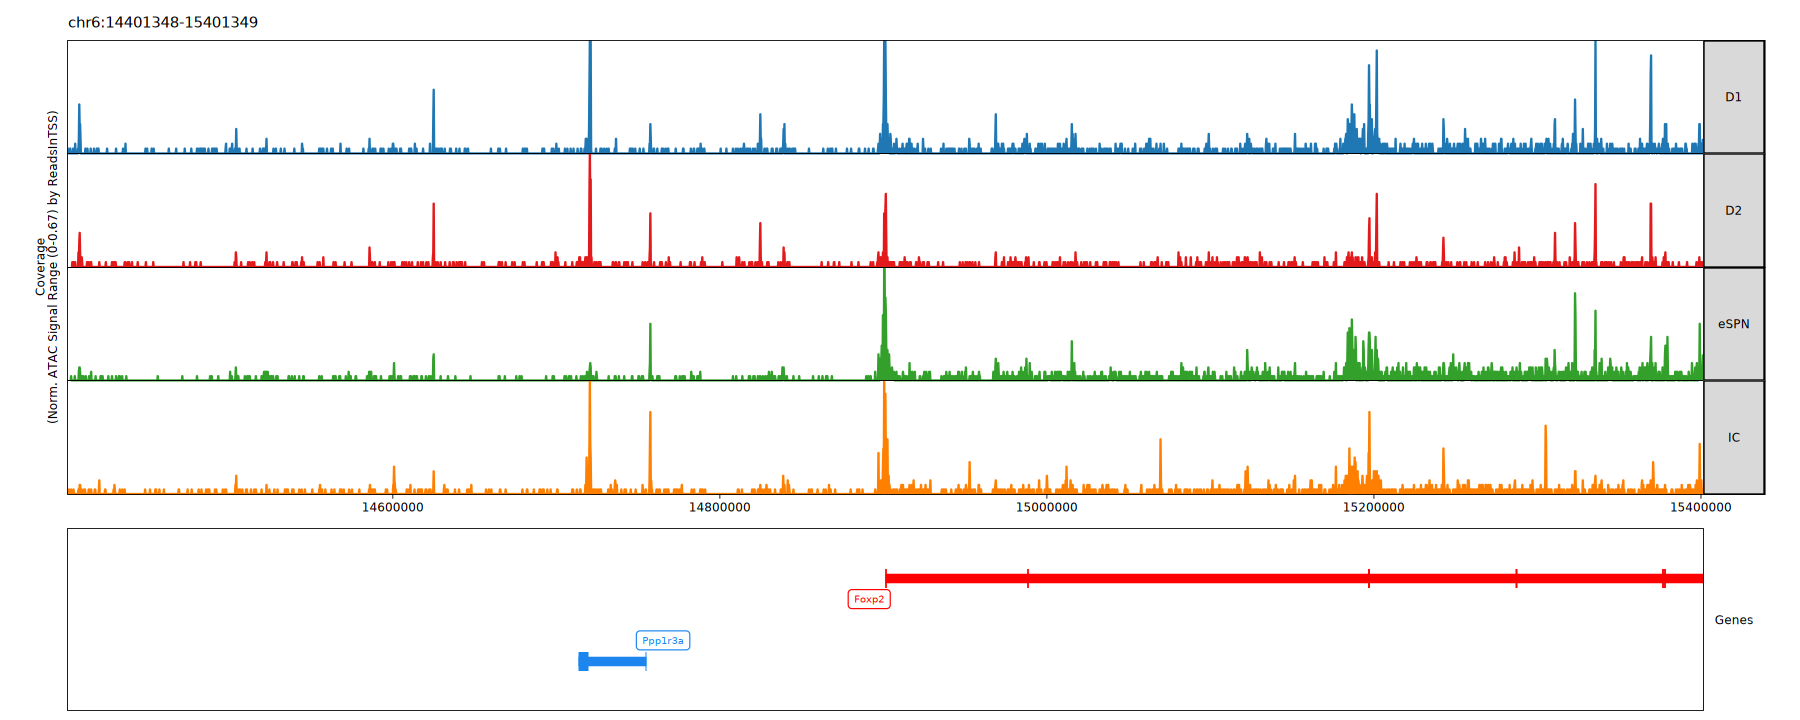

In [43]:
grid::grid.draw(p$Foxp2)

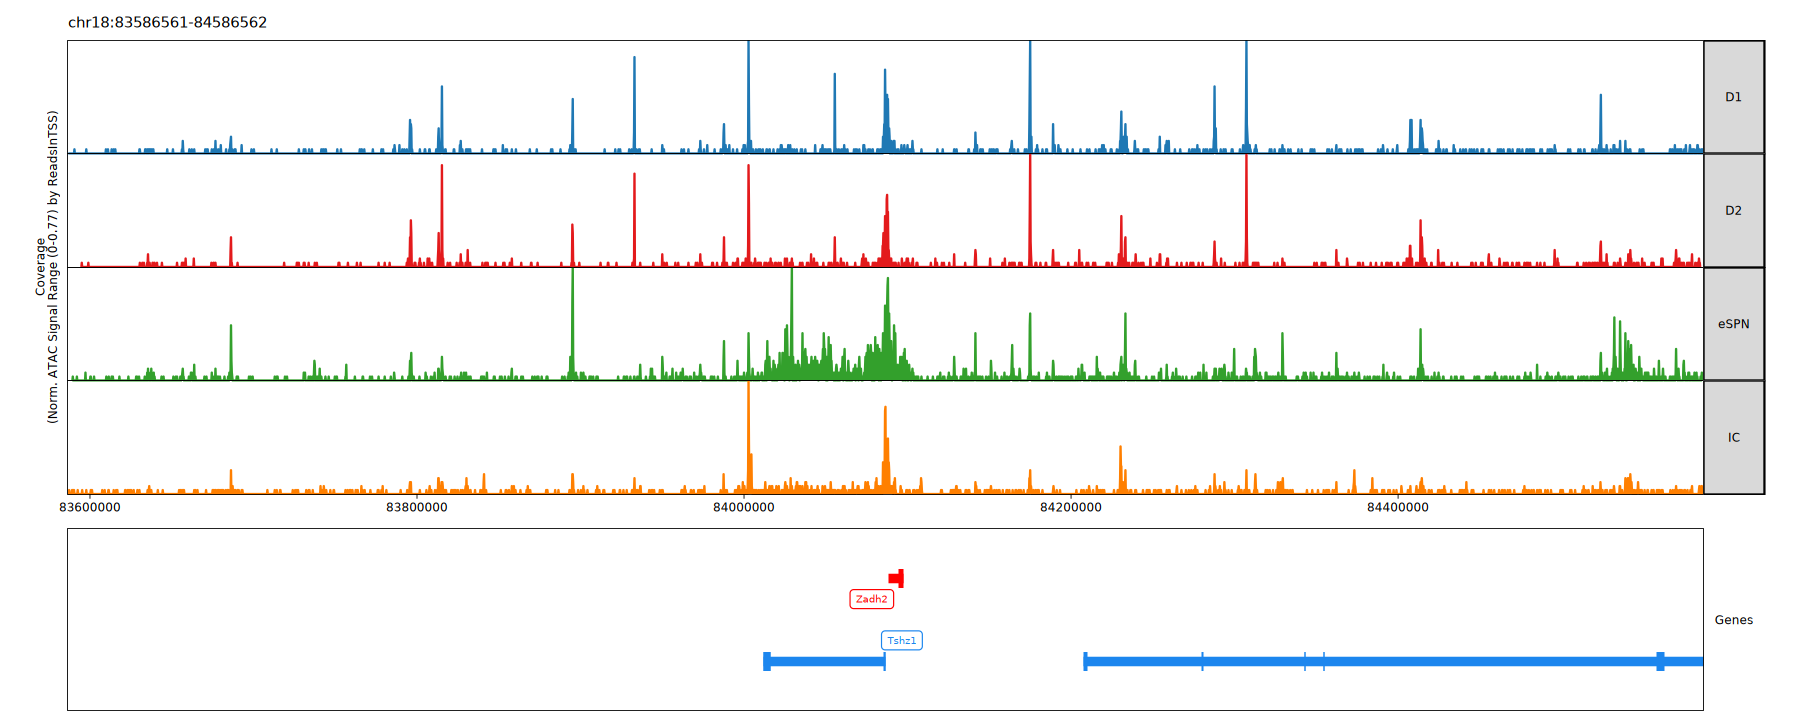

In [44]:
grid::grid.draw(p$Tshz1)